In [149]:
import importlib
import graphviz
import graph
import graph_games
import game_solver
from typing import Union
importlib.reload(graph)
importlib.reload(graph_games)
importlib.reload(game_solver)



<module 'game_solver' from '/home/nemo/Graph_Game_Design/game_solver.py'>

{}


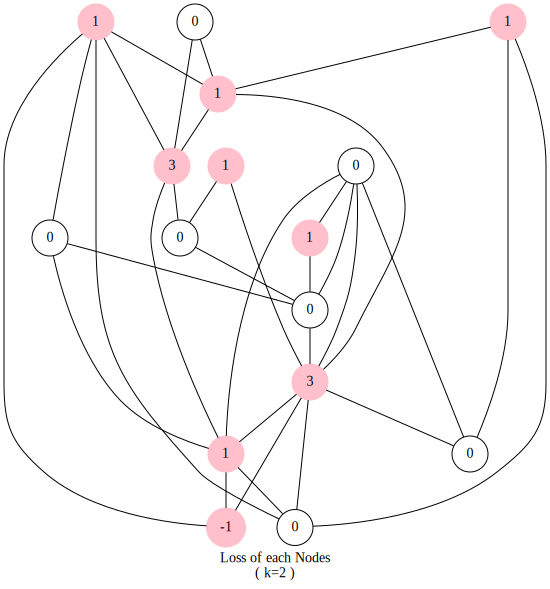

In [138]:
def visualize(g: Union[graph.Graph, graph_games.Game]) -> graphviz.Graph:
    if isinstance(g, graph.Graph):
        dot = graphviz.Graph()
        drawn = set()
        for ni in g.nodes:
            dot.attr('node', shape='circle')
            drawn.add(ni)
            dot.node(ni)
            #print(list((ni, nj) for nj in g.edges[ni]))
            dot.edges((ni,nj) for nj in g.edges[ni] if nj in drawn)
        return dot
    if isinstance(g, graph_games.K_DominationGame):
        dot = graphviz.Graph()
        drawn = set()
        print(dot.node_attr)
        for ni in g.graph.nodes:
            if ni in g.dominators:
                dot.attr('node', shape='circle', style='filled', color='pink')
            else:
                dot.attr('node', shape='circle', style='', color='black')
            dot.node(ni, str(g.getUtil(ni)))
            drawn.add(ni)
            dot.edges((ni,nj) for nj in g.graph.neighbors(ni) if nj in drawn)
        dot.attr(label=f'Loss of each Nodes \n ( k={g.k} )')
        return dot

g = graph.randomWSGraph(n=16, k=4, link_rewiring_prob=0.5)
gg = graph_games.K_DominationGame(2, g)
gg.randomInit()
visualize(gg)


{}


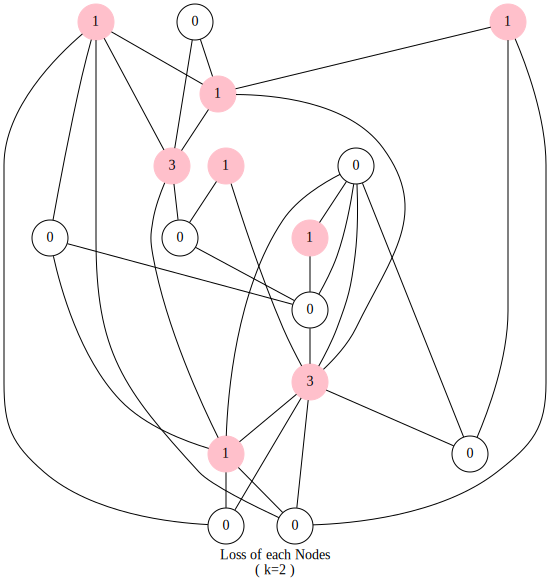

In [139]:
game_solver.bestResponseSolver(gg)
visualize(gg)

In [137]:
gg.checkDomination()

True

{}


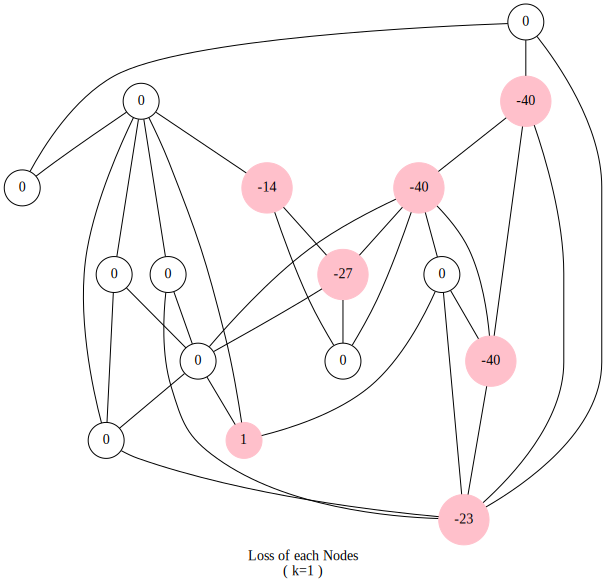

In [151]:
g = graph.randomWSGraph(n=16, k=4, link_rewiring_prob=0.5)
gg = graph_games.asymmetricIDSGame(g)
gg.randomInit()
visualize(gg)

{}


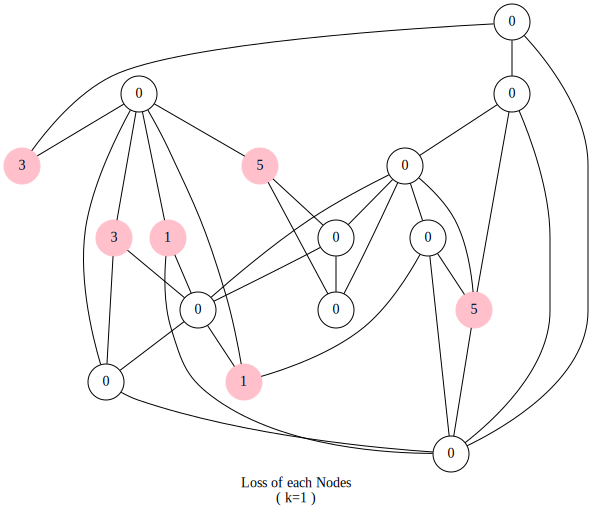

In [152]:
gg.solve(game_solver.bestResponseSolver)
visualize(gg)

In [153]:
print(gg.checkDomination())
print(gg.checkIndependence())

True
True
